In [1]:
import theano.tensor as T
import theano
import numpy as np
import matplotlib.pyplot as plt
theano.config.compute_test_value = "ignore"

%matplotlib inline
import sys, os

sys.path.append("../gempy")
sys.path.append("../")
# Importing GeMpy modules
import gempy as gp
import pandas as pn

In [2]:
gp.read_pickle('sandstone.pickle')

In [3]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000-10000,747000 + 20600,6863000 - 20600,6950000 + 20600,-20000, 600],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

# Assigning series to formations as well as their order (timewise)
gp.set_data_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"], verbose=1)

,EarlyGranite_Series,BIF_Series,SimpleMafic_Series
0,EarlyGranite,SimpleMafic2,SimpleMafic1
1,EarlyGranite,SimpleBIF,SimpleMafic1


gp.get_raw_data(geo_data, 'interfaces').head()

In [4]:
interp_data = gp.InterpolatorInput(geo_data, compile_theano=True )

I am in the setting
float32
I am here
[2, 2]


## Lith

In [9]:
lith = gp.compute_model(interp_data)[-1,0,:]
sol = gp.compute_model(interp_data)

[9 9 9]


/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7889622228040025e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


[9 9 9]


In [95]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

In [11]:
np.place(lith, lith == 1, 2.61)
np.place(lith, lith == 2, 2.92)
np.place(lith, lith == 3, 3.1)
np.place(lith, lith == 4, 2.92)
np.place(lith, lith == 0, 2.61)
np.unique(lith)

array([ 2.6099999 ,  2.92000008,  3.0999999 ], dtype=float32)

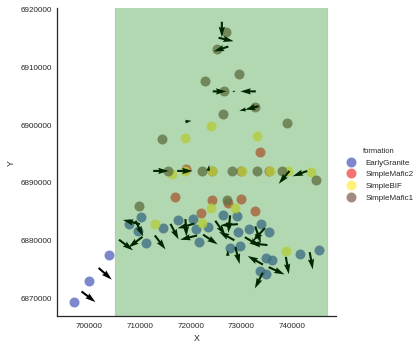

In [5]:
from matplotlib.patches import Rectangle

gp.plot_data(geo_data, direction='z')
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

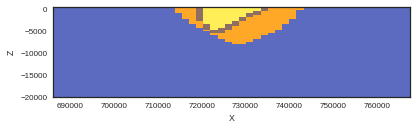

In [9]:
gp.plot_section(geo_data, sol[-1, 0, :], 20, direction='y')


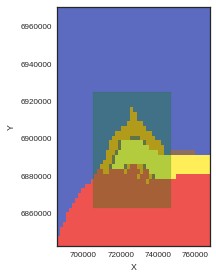

In [10]:
gp.plot_section(geo_data, sol[-1, 0, :], -1, direction='z')

from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05, 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

## Real gravity

In [103]:
grav_real = pn.read_csv('Sst_grav_500.xyz', header=None, names = ['X', 'Y', 'N', 'G'], delim_whitespace=True)

In [104]:
grav_real['Y'].max(), grav_real['Y'].min()

(6925000, 6863000)

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


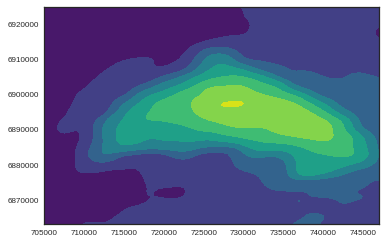

In [105]:
plt.contourf(grav_real['X'].reshape(125,85),
             grav_real['Y'].reshape(125,85),
             grav_real['G'].reshape(125,85), cmap='viridis',
            )
plt.grid()

## Grav

In [58]:
import sys
import gempy as gp
#from GeoPhysics import GeoPhysicsPreprocessing
import GeoPhysics
from importlib import reload
reload(GeoPhysics)

inter_data = gp.InterpolatorInput(geo_data, compile_theano=False)
gpp = GeoPhysics.GeoPhysicsPreprocessing(inter_data,580,  [7.050000e+05,747000,6863000,6925000,-20000, 200], 
                              res_grav = [50, 50],
                              n_cells = 10, mode='range')
                              #res_grav = [125, 85],
                              #n_cells =1000)
print(gpp)


# Theano function
x_1 = T.matrix()
x_2 = T.matrix()

sqd = T.sqrt(T.maximum(
    (x_1 ** 2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2 ** 2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd, allow_input_downcast=True)


I am in the setting
float32
I am here
[2, 2]
0.1908919617392378


In [112]:
tz.shape

(25, 6700)

In [110]:
b_all = np.zeros((0,50*50*50), dtype=bool)
tz_all = np.zeros((0,50*50*50)

In [111]:
b_all

array([], shape=(0, 125000), dtype=bool)

In [124]:
i_0 = 0
b_all = np.zeros((0,50*50*50), dtype=bool)
for i_1 in np.arange(25, gpp.airborne_plane.shape[0]+1, 25, dtype=int):#np.linspace(gpp.airborne_plane.shape[0]/25, gpp.airborne_plane.shape[0], 26, dtype=int):
    airborne_plane_s = gpp.airborne_plane[i_0:i_1]


    d = eu(inter_data.data.grid.grid.astype('float'), airborne_plane_s)
    ab_g = inter_data.data.grid.grid[np.argmin(d, axis=0)]
    ab_g[:,2] = ab_g[:,2] + 0.01

    d2 = eu(ab_g, inter_data.data.grid.grid.astype('float'))

    b = d2<0.190
    b_all = np.vstack((b_all, b))
#     selected_grid_x = np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, :25][b]
#     selected_grid_y = np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, 25:50][b]
#     selected_grid_z = np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, -25:][b]

    s_gr_x = (np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, :25].T[b].reshape(25,-1) - ab_g[:,0].reshape(25,-1)).astype('float')
    s_gr_y = (np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, 25:50].T[b].reshape(25,-1) - ab_g[:,1].reshape(25,-1)).astype('float')
    s_gr_z = (np.repeat(inter_data.data.grid.grid, 25, axis=1)[:, -25:].T[b].reshape(25,-1) - ab_g[:,2].reshape(25,-1)).astype('float')

    x_cor = np.stack((s_gr_x - gpp.vox_size[0], s_gr_x + gpp.vox_size[0]), axis=2)
    y_cor = np.stack((s_gr_y - gpp.vox_size[1], s_gr_y + gpp.vox_size[1]), axis=2)
    z_cor = np.stack((s_gr_z - gpp.vox_size[2], s_gr_z + gpp.vox_size[2]), axis=2)



    x_matrix = np.repeat(x_cor, 4, axis=2)
    y_matrix = np.tile(np.repeat(y_cor, 2, axis=2), (1, 1, 2))
    z_matrix = np.tile(z_cor, (1, 1, 4))
    
    s_r = np.sqrt(x_matrix**2 + y_matrix**2 + z_matrix**2)
    
    #dist = d2[b].reshape(25,-1)
    
   # s_r = np.repeat(np.expand_dims(dist, axis=2), 8, axis=2)

    from scipy.constants import G
    mu = np.array([1, -1, -1, 1, -1, 1, 1, -1])

    tz = np.sum(- G * mu * (
            x_matrix * np.log(y_matrix + s_r) +
            y_matrix * np.log(x_matrix + s_r) -
            z_matrix * np.arctan(x_matrix * y_matrix /
                                (z_matrix * s_r))), axis=2)


    if i_0 == 0:
        tz_all = tz
#         lith_s =  np.tile(lith, (25,1))[b].reshape(25,-1)
#         grav = np.tile(lith, (25,1))[b].reshape(25,-1) * np.nan_to_num(tz)
    else:
        tz_all = np.vstack((tz_all, tz))
#         lith_s = np.vstack((lith_s, np.tile(lith, (25,1))[b].reshape(25,-1)))
#         grav = np.vstack((grav, np.tile(lith, (25,1))[b].reshape(25,-1) * np.nan_to_num(tz)))

    i_0 = i_1



In [127]:
lith_s = np.tile(lith, (2500,1))[b_all].reshape(2500,-1)
grav = lith_s* tz_all

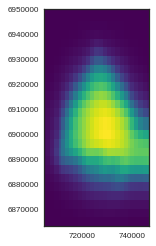

In [129]:
%matplotlib inline
plt.imshow(grav.sum(axis=1).reshape(50,50), cmap='viridis', origin='lower', extent=[7.050000e+05,747000,6863000,6950000])

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


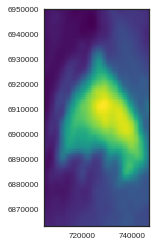

In [107]:
plt.imshow(grav_real['G'].reshape(125,85), extent=[7.050000e+05,747000,6863000,6950000], origin='lower', cmap='viridis')

In [41]:
np.unique(lith)

array([ 2.6099999 ,  2.92000008,  3.0999999 ], dtype=float32)

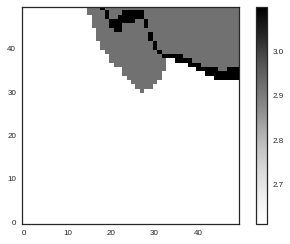

In [49]:
%matplotlib inline
plt.imshow(lith.reshape(50,50,50).T[:,17,:], origin='botom')
plt.colorbar()

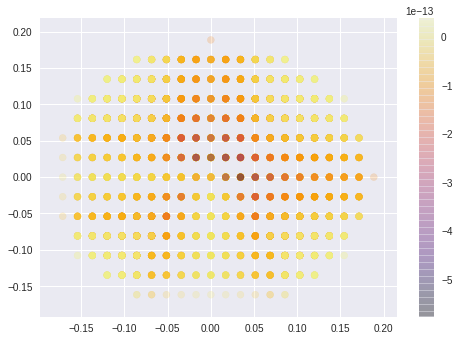

In [58]:
tz_n = 2
n_m = 13
plt.scatter(selected_grid_x.reshape(25,-1)[n_m,:], selected_grid_z.reshape(25,-1)[n_m,:],
            c = -tz[n_m,:].astype('float') , cmap ='inferno',
           alpha=0.2)

# plt.scatter(selected_grid_x.reshape(25,-1)[2,:], selected_grid_z.reshape(25,-1)[2,:],
#             s=tz[2,:,tz_n]*(-50), c = tz[2,:,tz_n].astype('float'), cmap = 'viridis',
#            alpha=0.2)
plt.colorbar()

In [57]:
plt.scatter(selected_grid_x.reshape(25,-1)[n_m,:], selected_grid_z.reshape(25,-1)[n_m,:],
            c = lith[0, :].astype('float') , cmap ='inferno',
           alpha=0.2)

NameError: name 'selected_grid_x' is not defined

In [519]:
grav.shape

(25, 7246)

In [403]:
(tz[20,:,3].astype('float') + tz[20,:,2]).max()

-0.0024731365988233112

In [393]:
print(tz[0,:,7], tz[0,:,6], tz[0,:,0], tz[0,:,1])

[ 0.53945031  0.54036368  0.5410961  ...,  1.00891393  1.01085623
  1.0124784 ] [-0.53926336 -0.54017973 -0.54091533 ..., -1.00594386 -1.00792015
 -1.0095783 ] [-0.41932633 -0.41996921 -0.42047567 ..., -0.9439272  -0.94519619
 -0.94615084] [ 0.41936828  0.42001045  0.42051616 ...,  0.94551223  0.94675803
  0.94768827]


In [329]:
plt.imshow(tz.sum(axis=1)[:,8].reshape(5,5))
plt.colorbar()

IndexError: index 8 is out of bounds for axis 1 with size 8

In [107]:
lith_s.shape

(2500, 6146)

In [63]:
s_gr_x.reshape(25,-1)[0,:]

array([-0.18861006, -0.17146363, -0.17146363, ...,  0.17146363,
        0.17146363,  0.18861006])

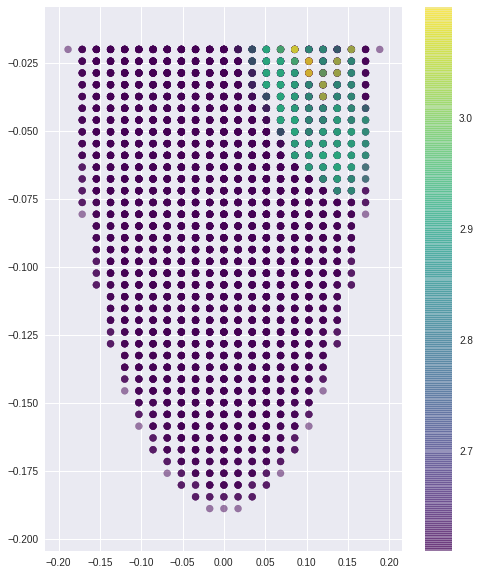

In [114]:
%matplotlib inline
tz_n = 2
n_m = 13
plt.figure(figsize=(8,10))

if True:
    plt.scatter(s_gr_x.reshape(25,-1)[n_m,:], s_gr_z.reshape(25,-1)[n_m,:],
              #   c = tz.reshape(25,-1)[0,:].astype('float'), cmap = 'viridis',
                
                c = lith_s[403,:].astype('float'), cmap = 'viridis',
               alpha=0.5)

if False:
    plt.scatter(selected_grid_x.reshape(25,-1)[0,:], selected_grid_y.reshape(25,-1)[0,:],
                s=dist[0,:].astype('float')*50, c = dist[0,:].astype('float'))
plt.colorbar()
#plt.scatter(ab_g[:,0], ab_g[:,1])


#plt.scatter(inter_data.data.grid.grid[:,0], inter_data.data.grid.grid[:,1], alpha=0.2, s=0.7)


# plt.scatter(selected_grid_x.reshape(-1,25)[:,20], selected_grid_y.reshape(-1,25)[:,20],
#             s=selected_grid_z.reshape(-1,25)[:,20].astype('float')*10, c = selected_grid_z.reshape(-1,25)[:,20].astype('float'))

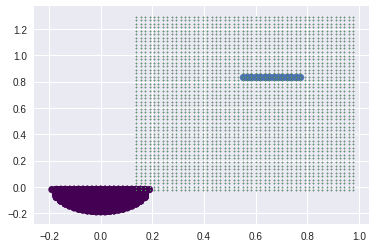

In [94]:
if True:
    plt.scatter(s_gr_x.reshape(25,-1)[n_m,:], s_gr_z.reshape(25,-1)[n_m,:],
                 #c = tz.reshape(25,-1)[0,:].astype('float'), cmap = 'viridis',
                
                c = s_l[n_m,:].astype('float'), cmap = 'viridis',
               alpha=1)
    
plt.scatter(ab_g[:,0], ab_g[:,1])

plt.scatter(inter_data.data.grid.grid[:,0], inter_data.data.grid.grid[:,1], alpha=0.2, s=0.7)

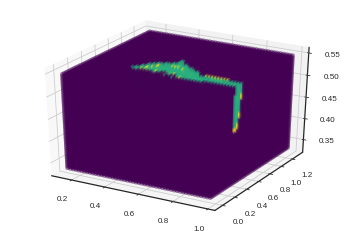

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib qt5
fig = plt.figure()
ax = fig.gca(projection='3d')



ax.scatter(inter_data.data.grid.grid[:,0], inter_data.data.grid.grid[:,1], inter_data.data.grid.grid[:,2],
              #   c = tz.reshape(25,-1)[0,:].astype('float'), cmap = 'viridis',
                
                c = lith.astype('float'), cmap = 'viridis',
               alpha=0.5)

#ax.scatter(inter_data.data.grid.grid[::1030,0], inter_data.data.grid.grid[::1030,1], inter_data.data.grid.grid[::1030,2])

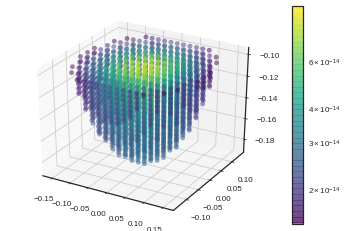

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib qt5
fig = plt.figure()
ax = fig.gca(projection='3d')


n_m = 10
p = ax.scatter(s_gr_x.reshape(25,-1)[n_m,:],s_gr_y.reshape(25,-1)[n_m,:], s_gr_z.reshape(25,-1)[n_m,:],
              #   c = tz.reshape(25,-1)[0,:].astype('float'), cmap = 'viridis',
                
                c = np.nan_to_num(tz[n_m,:]).astype('float'), cmap = 'viridis', norm=matplotlib.colors.LogNorm(),
               alpha=0.5)
fig.colorbar(p)
#ax.scatter(inter_data.data.grid.grid[::1030,0], inter_data.data.grid.grid[::1030,1], inter_data.data.grid.grid[::1030,2])

In [64]:
np.nantz[0]

array([  1.57241862e-14,   1.56599712e-14,   1.62244370e-14, ...,
         1.61546159e-14,   1.57243180e-14,   1.56601059e-14])

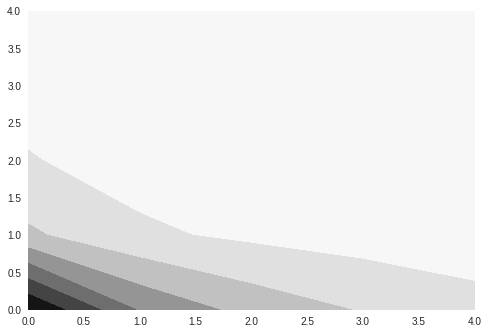

In [64]:
plt.contourf(t.sum(axis=0).reshape(5,5))

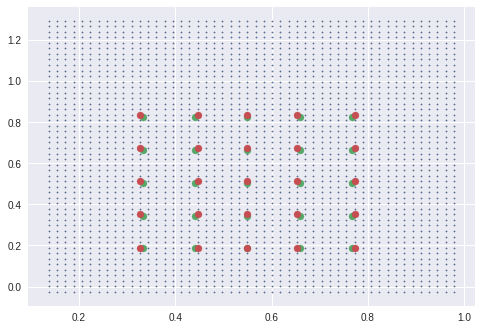

In [103]:

plt.scatter(inter_data.data.grid.grid[:,0], inter_data.data.grid.grid[:,1], alpha=0.2, s=0.7)
plt.scatter(gpp.airborne_plane[:,0], gpp.airborne_plane[:,1])
plt.scatter(ab_g[:,0], ab_g[:,1])

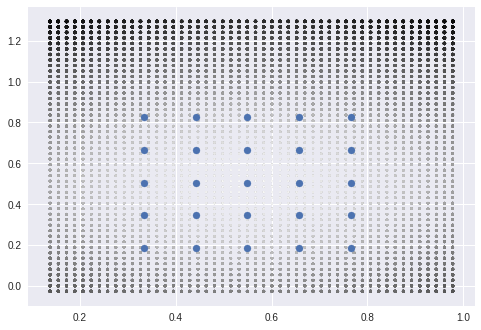

In [35]:
plt.scatter(inter_data.data.grid.grid[:,0], inter_data.data.grid.grid[:,1], s = 10*s_r[:,12], c= s_r[:, 12])
plt.scatter(gpp.airborne_plane[:,0], gpp.airborne_plane[:,1])

In [23]:
s_r = eu(gpp.grid, gpp.airborne_plane)
x_matrix = np.repeat(gpp.grid, 25, axis=1)[:, :25]
y_matrix = np.repeat(gpp.grid, 25, axis=1)[:, 25:50]
z_matrix = np.repeat(gpp.grid, 25, axis=1)[:, 50:]

In [9]:
x_matrix.shape

(125000, 25)

In [10]:
s_r.shape, x_matrix.shape

((125000, 25), (125000, 25))

In [11]:
tz =    (
                - x_matrix * np.log(y_matrix + s_r) -
                y_matrix * np.log(x_matrix + s_r) +
                z_matrix * np.arctan(x_matrix * y_matrix /
                                    (z_matrix * s_r)))

In [13]:
tz.shape

(125000, 25)

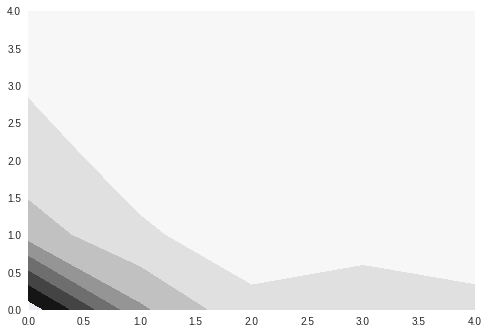

In [12]:
plt.contourf(a.sum(axis=0).reshape(5,5))

In [208]:
gpp.vox_size[0], *

array([ 0.01680343,  0.02639951,  0.00424204])

In [137]:
np.argmin(d, axis=0)

array([27949, 45449, 60449, 75449, 92949, 28249, 45749, 60749, 75749,
       93249, 28549, 46049, 61049, 76049, 93549, 28849, 46349, 61349,
       76349, 93849, 29149, 46649, 61649, 76649, 94149])

In [139]:
ab_g = gpp.grid[np.argmin(d, axis=0)]

<IPython.core.display.Javascript object>


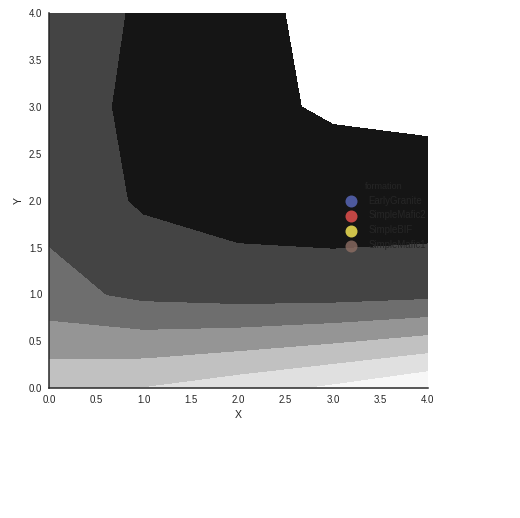

In [8]:
%matplotlib notebook
gp.plot_data(interp_data, direction='z')
plt.scatter(gpp.airborne_plane[:,0], gpp.airborne_plane[:,1])

In [140]:
dist = eu(gpp.grid, ab_g)

In [142]:
select = dist < 10600/interp_data.rescaling_factor

In [143]:
selected_dist = (dist * select)

In [149]:
select.sum(axis=0)

array([1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406,
       1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406, 1406,
       1406, 1406, 1406])

In [39]:
np.repeat(gpp.grid, 25, axis=1)[:, :25]

array([[ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       [ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       [ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       ..., 
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999],
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999],
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999]], dtype=float32)

In [144]:
# We get the 100 closest point of our grid!
s_gr_x = np.repeat(gpp.grid, 25, axis=1)[:, :25]
s_gr_y = np.repeat(gpp.grid, 25, axis=1)[:, 25:50]
s_gr_z = np.repeat(gpp.grid, 25, axis=1)[:, 50:]

# This is the euclidean distances between the plane (size size chunk) and the selected voxels. Repeated 8 time
# for the next eq
s_r = np.repeat(np.expand_dims(selected_dist, axis=2), 8, axis=2)

# x_cor = np.expand_dims(np.dstack((s_gr_x - self.vox_size[0], s_gr_x + self.vox_size[0])).T, axis=2)
# y_cor = np.expand_dims(np.dstack((s_gr_y - self.vox_size[1], s_gr_y + self.vox_size[1])).T, axis=2)
# z_cor = np.expand_dims(np.dstack((s_gr_z - self.vox_size[2], s_gr_z + self.vox_size[2])).T, axis=2)

In [41]:
s_gr_x

array([[ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       [ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       [ 0.13787825,  0.13787825,  0.13787825, ...,  0.13787825,
         0.13787825,  0.13787825],
       ..., 
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999],
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999],
       [ 0.97804999,  0.97804999,  0.97804999, ...,  0.97804999,
         0.97804999,  0.97804999]], dtype=float32)

In [202]:
# Now we need the coordinates not at the center of the voxel but at the sides
x_cor = np.stack((s_gr_x - gpp.vox_size[0], s_gr_x + gpp.vox_size[0]), axis=2)
y_cor = np.stack((s_gr_y - gpp.vox_size[1], s_gr_y + gpp.vox_size[1]), axis=2)
z_cor = np.stack((s_gr_z - gpp.vox_size[2], s_gr_z + gpp.vox_size[2]), axis=2)

# Now we expand them in the 8 combinations. Equivalent to 3 nested loops
#  see #TODO add paper
x_matrix = np.repeat(x_cor, 4, axis=2)
y_matrix = np.tile(np.repeat(y_cor, 2, axis=2), (1, 1, 2))
z_matrix = np.tile(z_cor, (1, 1, 4))

mu = np.array([1, -1, -1, 1, -1, 1, 1, -1])

from scipy.constants import G
tz = - G *1e+8* mu * (
        x_matrix * np.log(y_matrix + s_r) +
        y_matrix * np.log(x_matrix + s_r) -
        z_matrix * np.arctan(x_matrix * y_matrix /
                            (z_matrix * s_r)))

# tz = np.sum(np.nan_to_num(- G/interp_data.rescaling_factor * mu * (
#         x_matrix * np.log(y_matrix + s_r) +
#         y_matrix * np.log(x_matrix + s_r) -
#         z_matrix * np.arctan(x_matrix * y_matrix /
#                             (z_matrix * s_r)))), axis=2)

In [190]:
tz

array([[[             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10],
        [             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10],
        [             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10],
        ..., 
        [             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10],
        [             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10],
        [             nan,              nan,  -9.76138843e-11, ...,
                      nan,   1.15064766e-10,  -1.15954197e-10]],

       [[             nan,              nan,  -9.80676697e-11, ...,
                      nan,   1.15518551e-10,  -1.16407998e-10],
        [             nan,              nan,  -9.80676697e-1

In [112]:
(np.nan_to_num(tz))[15000, :,]

array([  1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31,   1.97215226e-31,   1.97215226e-31,
         1.97215226e-31])

In [195]:
np.nan_to_num(tz)[:, 0, 0].shape

(125000,)

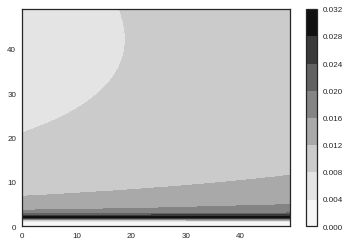

In [204]:
%matplotlib inline
plt.contourf((np.nan_to_num(tz))[:, 0, 5].reshape(50,50,50)[25,:,:])
plt.colorbar()

In [56]:
X, Y = np.meshgrid(geo_data.interfaces['X'], geo_data.interfaces['Y'])
geo_data.interfaces.shape

(70, 6)

In [7]:
a.shape

(100, 1800, 8)

In [28]:
from scipy.constants import G
G

6.67408e-11

In [8]:
np.argwhere(np.array([[0,1,1],[1,0,1]]))

array([[0, 1],
       [0, 2],
       [1, 0],
       [1, 2]])

In [7]:
gpp.interp_data.extent_rescaled

X     0.24084
X    0.765948
Y    0.186119
Y     1.08189
Z     0.33486
Z    0.542843
dtype: object

In [16]:
gp.get_series(geo_data)

,EarlyGranite_Series,BIF_Series,SimpleMafic_Series
0,EarlyGranite,SimpleMafic2,SimpleMafic1
1,EarlyGranite,SimpleBIF,SimpleMafic1


In [53]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

In [511]:
np.place(lith, lith == 1, 2.61)
np.place(lith, lith == 2, 2.92)
np.place(lith, lith == 3, 3.1)
np.place(lith, lith == 4, 2.92)
np.place(lith, lith == 0, 2.61)
np.unique(lith)

array([ 2.6099999 ,  2.92000008], dtype=float32)

In [510]:
np.place(lith, lith == 1, 2.61)
np.place(lith, lith == 2, 2.92)
np.place(lith, lith == 3, 2.92)
np.place(lith, lith == 4, 2.92)
np.place(lith, lith == 0, 2.92)
np.unique(lith)


array([ 2.6099999 ,  2.92000008], dtype=float32)

In [154]:
lith

array([ 2.6099999,  2.6099999,  2.6099999, ...,  2.6099999,  2.6099999,
        2.6099999], dtype=float32)

In [9]:

gr = gpp.compute_gravity(lith.reshape(-1,1), a)#.sum(axis=0)

In [515]:
grav = np.tile(lith, (25,1))[b].reshape(25,-1) * np.nan_to_num(tz)

In [509]:
gr_b = np.tile(lith, (25,1))[b].reshape(25,-1)

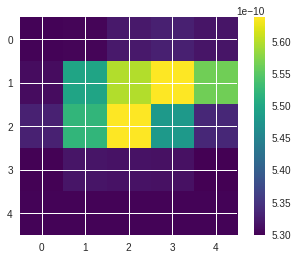

In [516]:
plt.imshow(grav.sum(axis=1).reshape(5,5), cmap='viridis')
plt.colorbar()

In [156]:
plt.imshow(np.tile(lith, (1,25)).reshape(5, 5), origin='bottom', cmap='viridis')
plt.colorbar()

ValueError: total size of new array must be unchanged

In [171]:
lith_f = np.tile(lith.reshape(-1,1), (1,25)) * select

In [175]:
lith_f.shape, tz.shape

((125000, 25), (125000, 25))

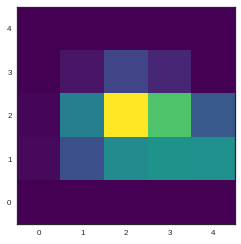

In [188]:
plt.imshow(lith_f.sum(axis=0).reshape(5, 5), origin='bottom', cmap='viridis')

In [184]:
w = (lith_f * tz)
w.sum(axis=0)

array([ -1.36941039e-16,  -9.62458445e-18,   3.84378307e-17,
         5.81796086e-17,   6.44490423e-17,   7.03039463e-17,
         7.53242719e-17,   6.34458552e-17,   5.08104621e-17,
         3.91840112e-17,   7.00689579e-17,   5.04069706e-17,
         3.84520329e-17,   2.80972909e-17,   1.98940213e-17,
         5.15366559e-17,   3.15609259e-17,   2.21091096e-17,
         1.59772117e-17,   1.13689208e-17,   3.74863939e-17,
         2.14714686e-17,   1.44962056e-17,   1.04147046e-17,
         7.47380289e-18])

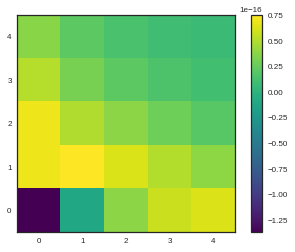

In [185]:


np.nan_to_num(w).sum(axis=1)

plt.imshow(w.sum(axis=0).reshape(5, 5), origin='bottom', cmap='viridis')
plt.colorbar()

In [18]:
w

array([  1.33842286e-17,   1.31640358e-17,   1.29918640e-17, ...,
         2.46187805e-19,   2.44243123e-19,   2.39036315e-19])

In [34]:
a.shape

(100, 2800)

In [36]:
lith.shape

(125000,)

In [22]:
gr.max(), gr.min()

(296.50012, 261.00003)

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


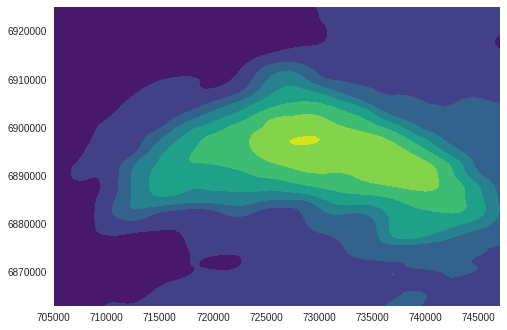

In [14]:
plt.contourf(grav_real['X'].reshape(125,85),
             grav_real['Y'].reshape(125,85),
             grav_real['G'].reshape(125,85), cmap='viridis',
            )
plt.grid()

In [46]:
w

array([  1.29991644e-12,   1.27853065e-12,   1.26180881e-12, ...,
         2.39104982e-14,   2.37216248e-14,   2.32159240e-14])

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


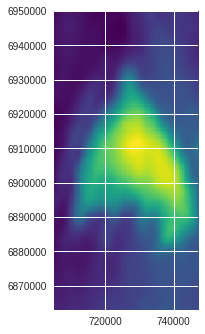

In [29]:
plt.imshow(grav_real['G'].reshape(125,85), extent=[7.050000e+05,747000,6863000,6950000], origin='lower', cmap='viridis')

In [28]:
7.050000e+05 -747000,6863000 -6950000

(-42000.0, -87000)

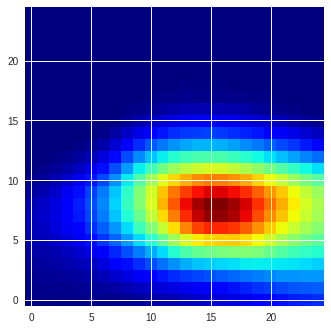

In [18]:
plt.imshow(gr.reshape(25,25), origin='bottom', cmap='jet')

In [ ]:
plt.imshow(gr.reshape(50,50), origin='bottom', cmap='viridis_r')

In [20]:
from scipy.constants import G
G


6.67408e-11

In [57]:
for aa in range(2):
   # print(aa, 'a')
    for bb in range(2):
    #    print(bb, 'b')
        for cc in range(2):
     #       print(cc, 'c')
      #      print('iter', aa, bb, cc)
            print((-1) ** aa * (-1) ** bb * (-1) ** cc)

1
-1
-1
1
-1
1
1
-1


In [12]:
for aa in range(2):
    print(aa)

0
1


In [ ]:
tz = tz - NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
            dx[:, aa] * np.log(dy[:, bb] + r) +
            dy[:, bb] * np.log(dx[:, aa] + r) -
            dz[:, cc] * np.arctan(dx[:, aa] * dy[:, bb] /
                                  (dz[:, cc] * r)))

In [13]:
g = inter_data.data.grid.grid

In [45]:
dx= np.vstack((g[:, 0] - vox_size[0], g[:, 0] + vox_size[0])).T
dy = np.vstack((g[:, 1] - vox_size[1] , g[:, 1] + vox_size[1])).T
dz = np.stack((g[:, 2] - vox_size[2], g[:, 2] + vox_size[2])).T


In [58]:
mu = np.array([1,-1,-1,1,-1,1,1,-1])

In [41]:
dx_matrix = np.repeat(dx, 4, axis=1)

In [55]:
dy_matrix = np.tile(np.repeat(dy, 2, axis=1), (1,2)).shape

In [46]:
dz_matrix = np.tile(dz, (1,4))
dz_matrix.shape

(125000, 8)

In [62]:
dx_matrix 

array([[0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       [0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       [0.23033833180606034, 0.23033833180606034, 0.23033833180606034, ...,
        0.2513426253307661, 0.2513426253307661, 0.2513426253307661],
       ..., 
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107],
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107],
       [0.755445669923705, 0.755445669923705, 0.755445669923705, ...,
        0.7764499634484107, 0.7764499634484107, 0.7764499634484107]], dtype=object)

In [13]:
np.vstack?

In [15]:
x_extent = inter_data.extent_rescaled.iloc[1] - inter_data.extent_rescaled.iloc[0]
y_extent = inter_data.extent_rescaled.iloc[3] - inter_data.extent_rescaled.iloc[2]
z_extent = inter_data.extent_rescaled.iloc[5] - inter_data.extent_rescaled.iloc[4]
vox_size = np.array([x_extent, y_extent, z_extent])/geo_data.resolution

In [11]:
d_x

array([ 0.01050215,  0.01791543,  0.00453034])

In [3]:
lith = np.load('sandstone_lith.npy')

In [2]:
geo_data = gp.read_pickle('geo_data.pickle')

In [3]:
inter_data = gp.InterpolatorInput(geo_data, compile_theano=False)

I am in the setting
float32
I am here
[2, 2]


In [4]:
inter_data.__dict__

{'centers': X         721180
 Y    6.89349e+06
 Z       -3951.36
 dtype: object,
 'data': <gempy.DataManagement.InputData at 0x7f392ecb6b70>,
 'dtype': 'float32',
 'extent_rescaled': X     0.24084
 X    0.765948
 Y    0.186119
 Y     1.08189
 Z     0.33486
 Z    0.561377
 dtype: object,
 'interpolator': <gempy.DataManagement.InterpolatorInput.InterpolatorClass at 0x7f3990094e48>,
 'rescaling_factor': 97123.0,
 'u_grade': None}

In [11]:
k = inter_data.set_airbore_plane(2100, [5,5])

In [14]:
inter_data.extent_rescaled.iloc[0], inter_data.extent_rescaled

(0.24084047856841323, X     0.24084
 X    0.765948
 Y    0.186119
 Y     1.08189
 Z     0.33486
 Z    0.561377
 dtype: object)

In [89]:
z = 2100/inter_data.data.rescaling_factor
res_grav = np.array([5, 5])


In [90]:
g  = np.meshgrid(np.linspace(geo_data.extent[0], 
                             geo_data.extent[1], res_grav[0]),
                 np.linspace(geo_data.extent[2], 
                             geo_data.extent[3], res_grav[1]))
h = np.ones(res_grav[0]*res_grav[1])*z
i = np.vstack(map(np.ravel, g))

k = np.vstack((i, h) ).T.astype("float32")

In [15]:
gr.astype('float32')
 

array([[ 0.24084048,  0.18611927,  0.33485964],
       [ 0.24084048,  0.18611927,  0.33948243],
       [ 0.24084048,  0.18611927,  0.34410521],
       ..., 
       [ 0.76594782,  1.08189058,  0.55213094],
       [ 0.76594782,  1.08189058,  0.55675375],
       [ 0.76594782,  1.08189058,  0.56137651]], dtype=float32)

In [4]:
lith.nbytes

500000

In [3]:
#lith = np.load('sandstone_lith.npy')


### Compute distance

In [16]:
gr = inter_data.data.grid.grid.astype('float32')


In [17]:
x_1 = T.matrix()
x_2 = T.matrix()

sqd = T.sqrt(T.maximum(
    (x_1**2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2**2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd)

In [18]:
dist = eu(gr, k)

In [20]:
n1 = np.argsort(dist, axis=0)[:40,:]

In [21]:
n = np.indices((40,25))[1]

In [32]:
# Distances solved
dist[n1,n].shape, 40*25

((40, 25), 1000)

In [9]:
v = np.ones((40,1))


In [12]:
np.hstack((np.zeros((40,0)), v))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [33]:
sol = np.empty(0)
for i in range(25):
    sol = np.append(sol, lith[n1[:,i]])

In [45]:
from scipy.constants import G
G?

In [38]:
sol.reshape(40,25)[:, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  3.,
        2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
dist[n1,n][:, 0]

array([ 0.00100662,  0.00565226,  0.01027423,  0.01076713,  0.0121139 ,
        0.01484648,  0.01489858,  0.01830892,  0.01835119,  0.01913664,
        0.01952209,  0.02097053,  0.02121496,  0.02145661,  0.02193057,
        0.02216576,  0.02226771,  0.0235504 ,  0.02358201,  0.02376832,
        0.02414401,  0.02590423,  0.02610136,  0.02641462,  0.02674538,
        0.02818952,  0.02873194,  0.02876615,  0.0288117 ,  0.02899009,
        0.0299856 ,  0.03028427,  0.03069771,  0.03186667,  0.03212375,
        0.03216547,  0.03228385,  0.03264188,  0.03338841,  0.03375062], dtype=float32)

In [69]:
np.count_nonzero(dist), dist.shape[0]*25

(3124171, 3125000)

In [71]:
k

array([[  6.96000000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.86300000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.86300000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.88475000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.88475000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.08750000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.21500000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.34250000e+05,   6.90650000e+06,   2.10000000e+03],
       [  7.47000000e+05,   6.90650000e+06,   2.10000000e+03],
       [  6.96000000e+05,   6.92825000e+06,   2.1000000

In [65]:
dist[:,0]

array([  22057.63476562,   21673.99414062,   21283.43945312, ...,
        100831.5078125 ,  100789.8984375 ,  100831.5078125 ], dtype=float32)

In [53]:
b = np.ones((6,6))
b[[[2,4], 3,4],[[0,0],1,2]] = 9
b

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
T.indice

In [9]:
_bool = dist>10000

In [68]:
np.unique(j)

array([ 0.,  1.,  2.,  3.,  4.], dtype=float32)

In [14]:
j = _bool * (lith+1)[:, np.newaxis]


In [15]:
np.unique(j), j.shape

(array([ 0.,  1.,  2.,  3.,  4.,  5.], dtype=float32), (125000, 25))

In [23]:
np.nonzero(j)[1]

array([ 0,  1,  2, ..., 21, 22, 23])

In [27]:
np.nonzero(j[:,0])

(array([     0,      1,      2, ..., 124997, 124998, 124999]),)

In [35]:
T.nonzero_values(T.reshape(_bool, (-1,1))).eval()

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [36]:
T.argmin?

In [80]:
dist_o = dist.argsort(axis=0)

In [81]:
dist_o

array([[    43,  27597,  57547, ...,  62499,  92444, 124999],
       [    45,  30099,  62545, ...,  59997,  92448, 117498],
       [    46,  30044,  62546, ...,  57493,  89999, 124949],
       ..., 
       [124952, 124952, 124951, ..., 122501,      2,      2],
       [124951, 124951,   2450, ...,      0,      1,      1],
       [124950, 124950, 124950, ..., 122500,      0,      0]])

In [89]:
s = dist_o[:200000, :]

In [83]:
np.save('select', s)

In [90]:
d = np.take(dist, s)
d.shape

(125000, 25)

### Substitute lith for densities

In [108]:
s

array([[    43,  27597,  57547, ...,  62499,  92444, 124999],
       [    45,  30099,  62545, ...,  59997,  92448, 117498],
       [    46,  30044,  62546, ...,  57493,  89999, 124949],
       ..., 
       [124952, 124952, 124951, ..., 122501,      2,      2],
       [124951, 124951,   2450, ...,      0,      1,      1],
       [124950, 124950, 124950, ..., 122500,      0,      0]])

In [102]:
lith_tile[[[0],[1]], s]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,1) (125000,25) 

In [104]:
lith_tile[[[0],[1]], s]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,1) (125000,25) 

In [91]:
lith_tile = np.tile(lith, (25,1)).T

In [105]:
lith_select = np.take(np.ravel(lith_tile), s)

In [106]:
lith_tile.shape, s.shape

((125000, 25), (125000, 25))

In [93]:
{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

In [94]:
lith_select.shape

(125000, 25)

In [107]:
np.unique(lith_select)

array([ 0.,  1.], dtype=float32)

In [61]:
np.place(lith_select, lith_select == 1, 2.61)
np.place(lith_select, lith_select == 2, 2.92)
np.place(lith_select, lith_select == 3, 3.1)
np.place(lith_select, lith_select == 4, 2.92)
np.place(lith_select, lith_select == 0, 2.61)

In [62]:
np.unique(lith_select)

array([ 2.6099999], dtype=float32)

### Compute volume

In [9]:
x_extent = geo_data.extent[1] - geo_data.extent[0]
y_extent = geo_data.extent[3] - geo_data.extent[2]
z_extent = geo_data.extent[5] - geo_data.extent[4]

In [11]:
x_extent = geo_data.extent[1] - geo_data.extent[0]
y_extent = geo_data.extent[3] - geo_data.extent[2]
z_extent = geo_data.extent[5] - geo_data.extent[4]
d_x = np.array([x_extent, y_extent, z_extent])/geo_data.resolution

In [14]:
vol = d_x[0]*d_x[1]*d_x[2]
d_x, vol

(array([ 1020.,  1740.,   440.]), 780912000.0)

array([[ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       ..., 
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.],
       [ 4.,  4.,  4., ...,  4.,  4.,  4.]], dtype=float32)

In [48]:
lith_tile.shape

(125000, 100)

In [62]:
T.copy?

In [4]:
a = geo_data.grid.grid.reshape(50,50,50, 3)

In [6]:
b = a[:,:,0,:]

In [16]:
geo_data.grid.grid

array([[  6.96000000e+05,   6.86300000e+06,  -2.00000000e+04],
       [  6.96000000e+05,   6.86300000e+06,  -1.95510195e+04],
       [  6.96000000e+05,   6.86300000e+06,  -1.91020410e+04],
       ..., 
       [  7.47000000e+05,   6.95000000e+06,   1.10204077e+03],
       [  7.47000000e+05,   6.95000000e+06,   1.55102039e+03],
       [  7.47000000e+05,   6.95000000e+06,   2.00000000e+03]], dtype=float32)

In [10]:
b = np.indices((50,50,50))
b []

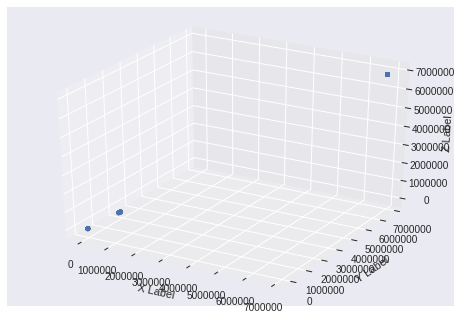

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = b[:,0]
ys = b[:,1]
zs = b[:,2]

ax.scatter(xs, ys, zs, )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()